In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [236]:
food = pd.read_csv(r"C:\Users\hayk.hayrapetyan\Desktop\Python\Pandas\U_Food\u_food_marketing.csv")

In [237]:
pd.set_option('display.max.columns', 50)
food.drop_duplicates(inplace = True)

In [238]:
# Total Children Column Creation
food['Total_Children'] = food['Kidhome'] + food['Teenhome']

In [239]:
# Marital Status Feature Engineering
food['marital_Divorced'] = food['marital_Divorced'].replace(1, 5)
food['marital_Married'] = food['marital_Married'].replace(1, 4)
food['marital_Single'] = food['marital_Single'].replace(1, 3)
food['marital_Together'] = food['marital_Together'].replace(1, 2)
food['Marital_Status'] = food[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].sum(axis = 1)
food['Marital_Status_str'] = food['Marital_Status'].map({5: "Divorced", 4: "Married", 3: "Single", 2: "Together", 1: "Widow"})

In [240]:
# Education Status Feature Engineering
food['education_2n Cycle'] = food['education_2n Cycle'].replace(1, 1)
food['education_Basic'] = food['education_Basic'].replace(1, 2)
food['education_Graduation'] = food['education_Graduation'].replace(1, 3)
food['education_Master'] = food['education_Master'].replace(1, 4)
food['education_PhD'] = food['education_PhD'].replace(1, 5)
food['Education_Status'] = food[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].sum(axis = 1)

In [241]:
# Campaign Acceptance Feature Engineering
food['Accepted_Campaigns'] = food[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2', 'AcceptedCmp1', 'Response']].sum(axis = 1)
food['Accepted_Campaigns'] = (food['Accepted_Campaigns'] != 0).astype(int)

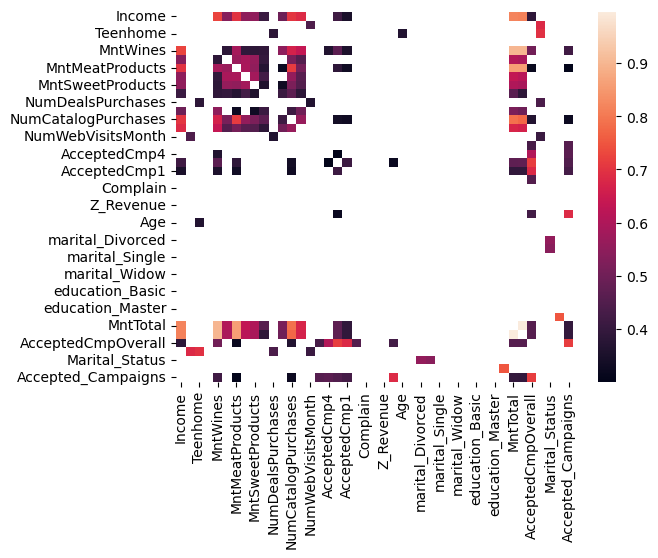

In [242]:
all_correlations = food.corr(method = 'pearson', numeric_only = True)
all_correlations = all_correlations[(all_correlations > 0.3) & (all_correlations < 1)]
sns.heatmap(all_correlations)
plt.show()

### Age Analysis

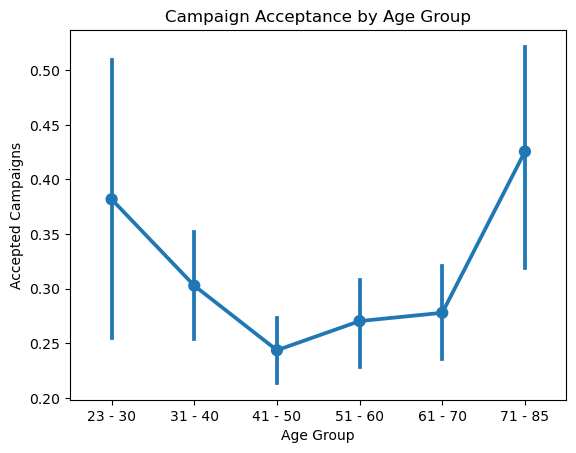

In [294]:
age_groups = [(23,30), (31,40),(41,50),(51,60), (61,70),(71,85)]

def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return ("Unknown")

food['Age Group'] = food['Age'].apply(assign_age_group)
age_order = ['23 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 85']
sns.pointplot(data = food, x = 'Age Group', y = 'Accepted_Campaigns', order = age_order)
plt.title('Campaign Acceptance by Age Group')
plt.xlabel("Age Group")
plt.ylabel("Accepted Campaigns")
plt.show()

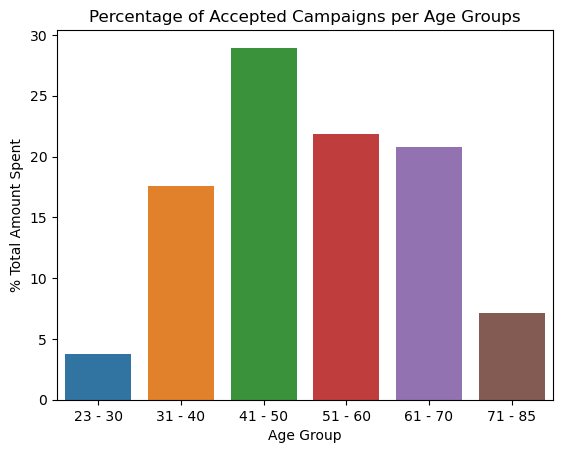

In [296]:
accepted_campaigns = food[food['Accepted_Campaigns'] > 0]
counts = accepted_campaigns['Age Group'].value_counts()
percentage = counts / accepted_campaigns.shape[0] * 100
percent_food = percentage.reset_index()
percent_food.columns = ['age_group', 'percentage']
percent_food = percent_food.sort_values('age_group')
sns.barplot(x = 'age_group', y = 'percentage', data = percent_food)
plt.title('Percentage of Accepted Campaigns per Age Groups')
plt.xlabel("Age Group")
plt.ylabel("% Total Amount Spent")
plt.show()

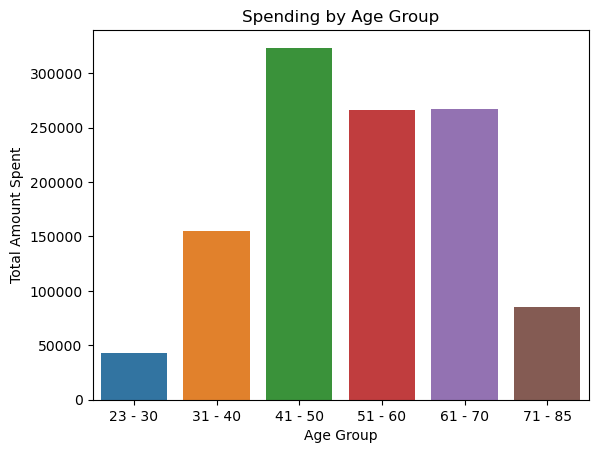

In [298]:
groupped_food = food.groupby('Age Group')['MntTotal'].sum().reset_index()
sns.barplot(x = 'Age Group', y = 'MntTotal', data = groupped_food)
plt.title("Spending by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Amount Spent")
plt.show()

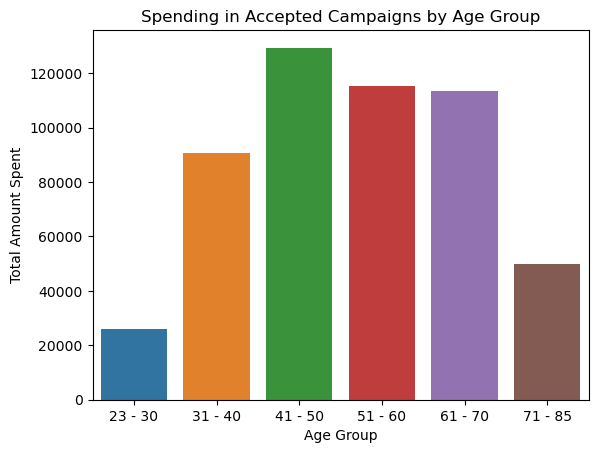

In [300]:
groupped_campaigns = accepted_campaigns.groupby('Age Group')['MntTotal'].sum().reset_index()
sns.barplot(x = 'Age Group', y = 'MntTotal', data = groupped_campaigns)
plt.title('Spending in Accepted Campaigns by Age Group')
plt.xlabel("Age Group")
plt.ylabel("Total Amount Spent")
plt.show()

### Purchase Source Analysis

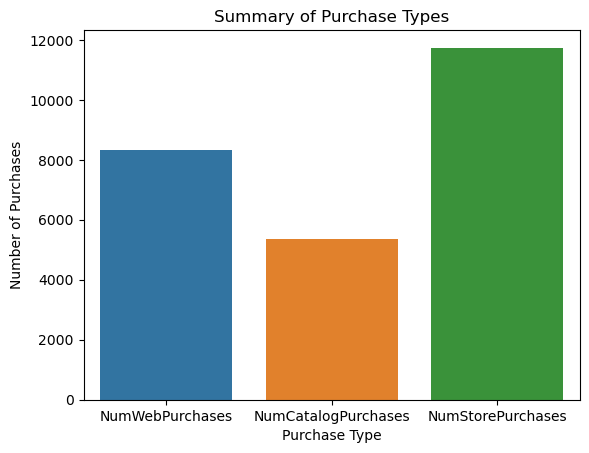

In [250]:
sum_food = food[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().reset_index()
sum_food.columns = ['Type_of_Purchase', 'Sums']
sns.barplot(x = 'Type_of_Purchase', y = 'Sums', data = sum_food)
plt.title("Summary of Purchase Types")
plt.xlabel("Purchase Type")
plt.ylabel("Number of Purchases")
plt.show()

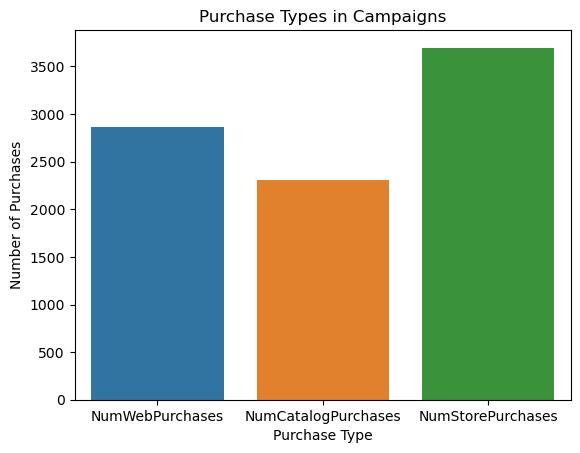

In [251]:
sum_campaigns = accepted_campaigns[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().reset_index()
sum_campaigns.columns = ['Type_of_Purchase', 'Sums']
sns.barplot(x = 'Type_of_Purchase', y = 'Sums', data = sum_campaigns)
plt.title("Purchase Types in Campaigns")
plt.xlabel("Purchase Type")
plt.ylabel("Number of Purchases")
plt.show()

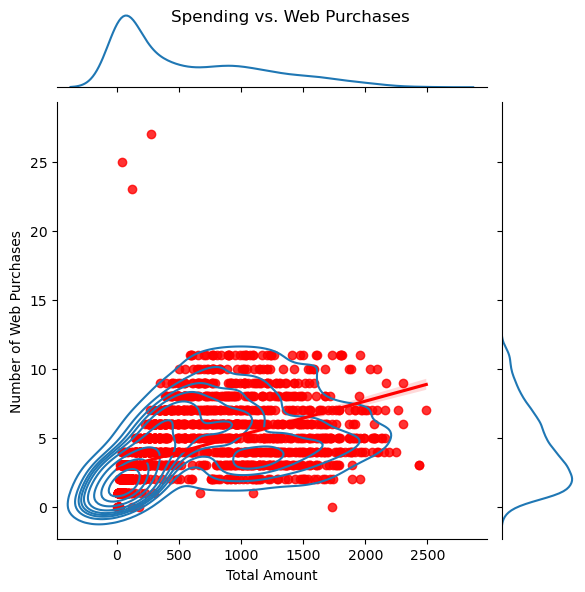

In [252]:
x = sns.jointplot(data=food, x='MntTotal', y='NumWebPurchases', kind='kde')
x.plot_joint(sns.regplot, color='r')
plt.suptitle("Spending vs. Web Purchases")
plt.xlabel("Total Amount")
plt.ylabel("Number of Web Purchases")
plt.show()

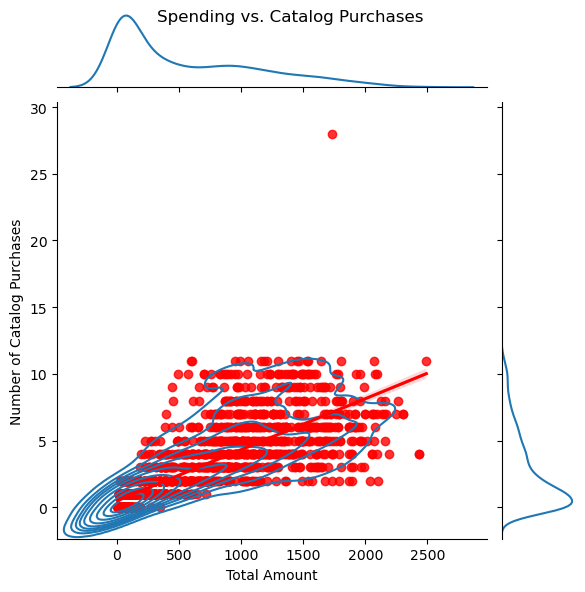

In [253]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumCatalogPurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'r')
plt.suptitle("Spending vs. Catalog Purchases")
plt.xlabel("Total Amount")
plt.ylabel("Number of Catalog Purchases")
plt.show()

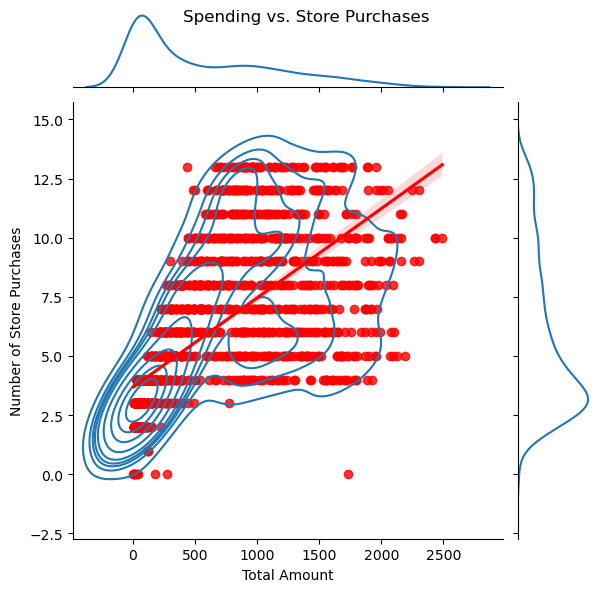

In [254]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumStorePurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'r')
plt.suptitle("Spending vs. Store Purchases")
plt.xlabel("Total Amount")
plt.ylabel("Number of Store Purchases")
plt.show()

### Child Demographics Analysis

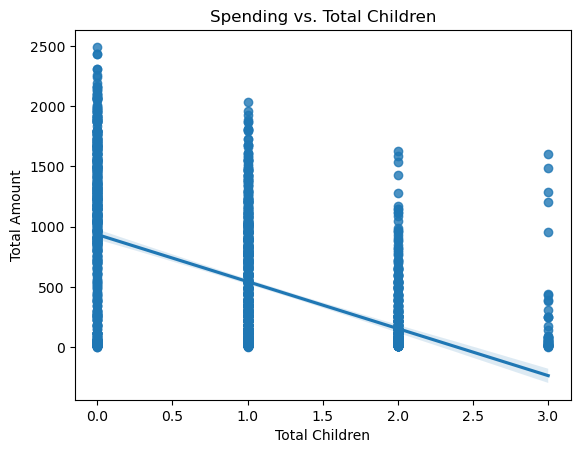

In [256]:
sns.regplot(x = 'Total_Children', y = 'MntTotal', data = food)
plt.title("Spending vs. Total Children")
plt.xlabel("Total Children")
plt.ylabel("Total Amount")
plt.show()

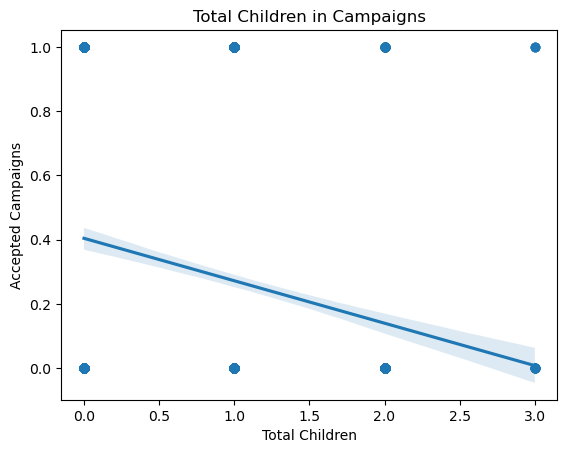

In [257]:
sns.regplot(x = 'Total_Children', y = 'Accepted_Campaigns', data = food)
plt.title("Total Children in Campaigns")
plt.xlabel("Total Children")
plt.ylabel("Accepted Campaigns")
plt.show()

### Educational Impact Analysis

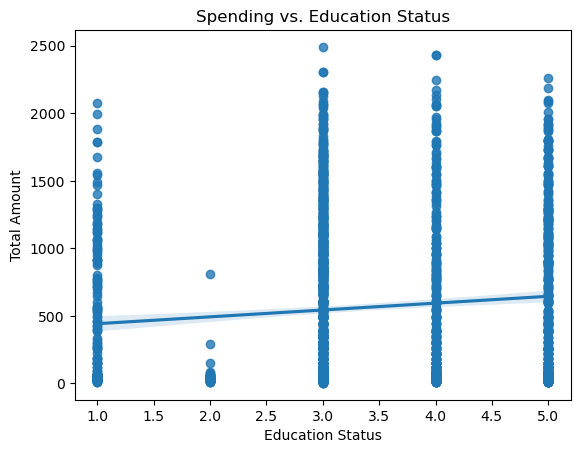

In [259]:
sns.regplot(x = 'Education_Status', y = 'MntTotal', data = food)
plt.title("Spending vs. Education Status")
plt.xlabel("Education Status")
plt.ylabel("Total Amount")
plt.show()

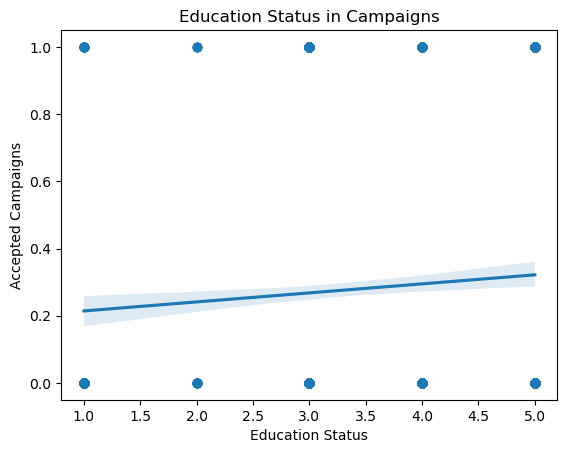

In [260]:
sns.regplot(x = 'Education_Status', y = 'Accepted_Campaigns', data = food)
plt.title("Education Status in Campaigns")
plt.xlabel("Education Status")
plt.ylabel("Accepted Campaigns")
plt.show()

### Marital Status Insights

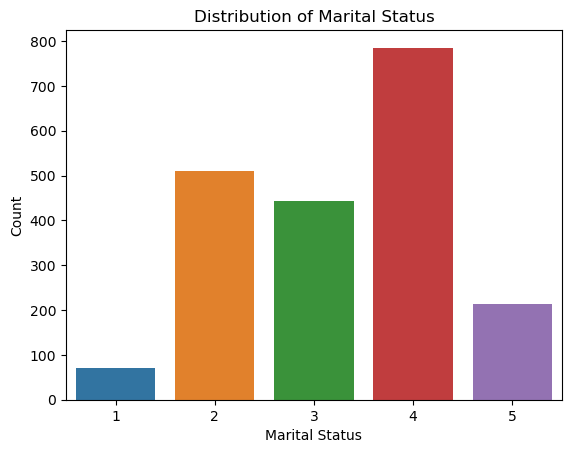

In [262]:
sns.countplot(x = 'Marital_Status', data = food)
plt.title("Distribution of Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

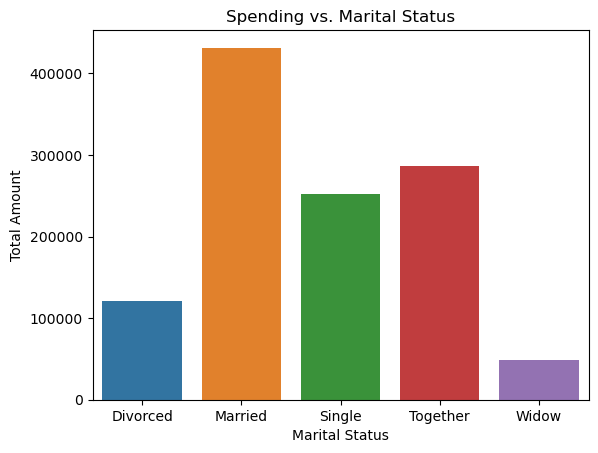

In [263]:
rel_food = food.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()
sns.barplot(x = 'Marital_Status_str', y = 'MntTotal', data = rel_food)
plt.title("Spending vs. Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Total Amount")
plt.show()

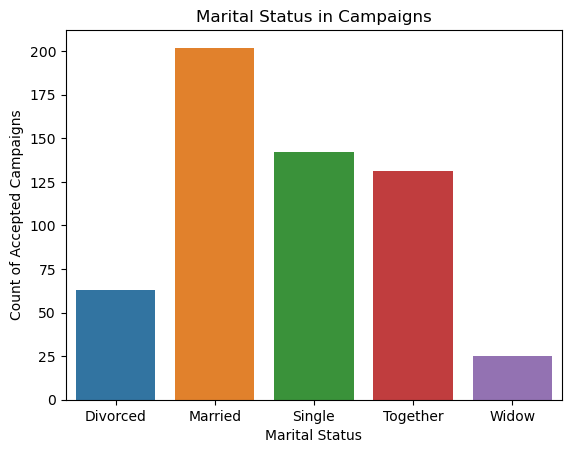

In [264]:
rel_campaigns = accepted_campaigns.groupby('Marital_Status_str')['Accepted_Campaigns'].sum().reset_index()
sns.barplot(x = 'Marital_Status_str', y = 'Accepted_Campaigns', data = rel_campaigns)
plt.title("Marital Status in Campaigns")
plt.xlabel("Marital Status")
plt.ylabel("Count of Accepted Campaigns")
plt.show()